<h1 style="color:black;">Classification Project: Newspaper Articles</h1>

<h3 style="color:blue;">PROJECT OVERVIEW</h3>

>The key goal of this classification project is for our team to develop machine learning models that can automatically classify newspaper articles. This project is an end-to-end project covering all stages, from loading and preprocessing data to training models, evaluating them, and deploying the solution as a web app using Streamlit.

<h3 style="color:blue;">IMPORTING PACKAGES</h3>

> This project will utilise the packages below to efficiently load, clean, analyse and visualise the newspaper article data. The packages are imported and necessary libraries are downloaded below:

In [20]:
# Importing Pandas for data manipulation and analysis
import pandas as pd

# Importing NumPy for numerical operations
import numpy as np

# Importing Matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing Seaborn for advanced data visualization
import seaborn as sns

# Importing IPython.display for displaying rich media in Jupyter Notebooks
from IPython.display import display, Image

# Importing nltk for tokenization, lemmatization, and text preprocessing
import nltk 

# Importing re for regular expressions to clean and manipulate text
import re

# Importing string for handling common string operations, such as removing punctuation
import string

# Importing nltk.corpus to improve text processing
from nltk.corpus import  stopwords

# Importing nltk.tokenize to split text into words or sentences for NLP tasks
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# Importing nltk.stem to converts words to their root forms, improving text understanding
from nltk.stem import WordNetLemmatizer

# Convert text to numerical vectors
from sklearn.feature_extraction.text import TfidfVectorizer 

# Splitting data
from sklearn.model_selection import train_test_split 


In [21]:
nltk.download(['punkt','punkt_tab','stopwords','wordnet'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kelly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kelly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kelly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kelly\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<h3 style="color:blue;">DATA LOADING</h3>

> When the required packages are imported, for loading a CSV file, this Project will utilise Pandas to load the data.

In [22]:
# Load training and testing datasets
train_df = pd.read_csv("https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/main/Data/processed/train.csv", encoding="utf-8")
test_df = pd.read_csv("https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/main/Data/processed/test.csv", encoding="utf-8")


In [23]:
# Display first few rows of the Dataframes as tables
display(train_df.head(2))
display(test_df.head(2))


,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business


,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education


<h3 style="color:blue;">DATA CLEANING AND TEXT PREPROCESSING</h3>


> Text cleaning is essential for improving model accuracy. We'll look into standardizing text by converting everything to lowercase, removing punctuation and special characters, splitting text into individual words for further processing and removing common words that don't add much meaning.

Let's start by printing a list of all categories that are present in this dataset

In [24]:
# Print list of unique newspaper categories
category_labels = list(train_df.category.unique())
print(category_labels)

['business', 'sports', 'entertainment', 'education', 'technology']


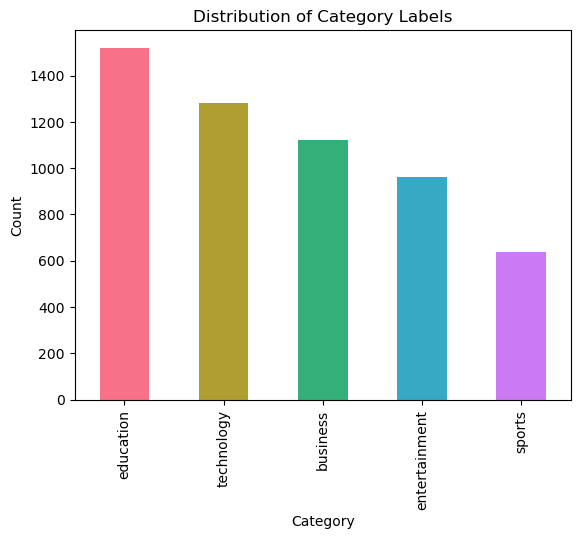

In [25]:
# Define a color palette
colors = sns.color_palette('husl', len(train_df['category'].value_counts()))

# Visualize the distribution of the categories with colored bars
train_df['category'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Category Labels')
plt.show()


In [26]:
# Shape of the dataset
train_df.shape

(5520, 5)

In [27]:
# Check for missing values
print("Missing values in dataset:\n", train_df.isnull().sum())

Missing values in dataset:
 headlines      0
description    0
content        0
url            0
category       0
dtype: int64


There was no need to handle missing values as there were none

In [28]:
#Remove duplicates
# Remove duplicate rows
train_df.drop_duplicates(inplace=True) 

In [29]:
# Check for duplicates
if train_df.duplicated().any():
    print("Duplicates are present in the dataset.")
else:
    print("No duplicates found in the dataset.")


No duplicates found in the dataset.


In [30]:
# Define the text preprocessing function
def format_data(text):
    """
    Function to clean text:
    - Convert to lowercase
    - Remove special characters
    - Tokenize and remove stopwords
    """
    if isinstance(text, str):  # Ensure the input is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"\W", " ", text)  # Remove special characters
        tokens = word_tokenize(text)  # Tokenize text
        filtered_tokens = [word for word in tokens if word not in stopwords.words("english")]  # Remove stopwords
        return " ".join(filtered_tokens)  # Join tokens back into a string
    return ""  # Handle cases with missing or invalid data


In [31]:
# Apply the function to each column
train_df["headlines"] = train_df["headlines"].apply(format_data)
train_df["description"] = train_df["description"].apply(format_data)
train_df["content"] = train_df["content"].apply(format_data)

# Preview the preprocessed data
print(train_df[["headlines", "description", "content"]].head())

                                           headlines  \
0  rbi revises definition politically exposed per...   
1  ndtv q2 net profit falls 57 4 rs 5 55 crore im...   
2  akasa air well capitalised grow much faster ce...   
3  india current account deficit declines sharply...   
4  states borrowing cost soars 7 68 highest far f...   

                                         description  \
0  central bank also asked chairpersons chief exe...   
1  ndtv consolidated revenue operations rs 95 55 ...   
2  initial share sale open public subscription ju...   
3  current account deficit cad 3 8 per cent gdp u...   
4  prices shot reflecting overall higher risk ave...   

                                             content  
0  reserve bank india rbi changed definition poli...  
1  broadcaster new delhi television ltd monday re...  
2  homegrown server maker netweb technologies ind...  
3  india current account deficit declined sharply...  
4  states forced pay nose weekly auction debt tue..

<h3 style="color:blue;">FEATURE ENGENEERING</h3>

In [32]:
#Display cleaned DataFrame 
train_df.head()

,headlines,description,content,url,category
0,rbi revises definition politically exposed per...,central bank also asked chairpersons chief exe...,reserve bank india rbi changed definition poli...,https://indianexpress.com/article/business/ban...,business
1,ndtv q2 net profit falls 57 4 rs 5 55 crore im...,ndtv consolidated revenue operations rs 95 55 ...,broadcaster new delhi television ltd monday re...,https://indianexpress.com/article/business/com...,business
2,akasa air well capitalised grow much faster ce...,initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,https://indianexpress.com/article/business/mar...,business
3,india current account deficit declines sharply...,current account deficit cad 3 8 per cent gdp u...,india current account deficit declined sharply...,https://indianexpress.com/article/business/eco...,business
4,states borrowing cost soars 7 68 highest far f...,prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,https://indianexpress.com/article/business/eco...,business


In [33]:
# Summary statistics
print(train_df.describe())

                                                headlines  \
count                                                5520   
unique                                               5512   
top     international education day 2024 know celebrat...   
freq                                                    2   

                                              description  \
count                                                5520   
unique                                               5506   
top     university removed requirements caiib certific...   
freq                                                    2   

                                                  content  \
count                                                5520   
unique                                               5513   
top     grand slam fever grips tennis fans world 2023 ...   
freq                                                    5   

                                                      url   category  
count      

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Format target variables
y_train = train_df['category']
y_test = test_df['category']

print('y_train shape:', y_train.shape)

y_train shape: (5520,)


In [35]:
# Defining a function to vectorize data
def vectorize_data(column):
    # Initialize CountVectorizer with stop_words handling and minimum document frequency
    vect = CountVectorizer(stop_words='english', min_df=0.01)  
    X_train = vect.fit_transform(train_df[column]).toarray()  # Transform and convert to NumPy array
    X_test = vect.transform(test_df[column]).toarray()

    return X_train, X_test

In [ ]:
# Apply vectorization to each column
X_headlines_train, X_headlines_test = vectorize_data('headlines')
X_description_train, X_description_test = vectorize_data('description')  
X_content_train, X_content_test = vectorize_data('content')

In [37]:
# Print results
print('X_headlines_train:', X_headlines_train.shape)
print('X_headlines_test:', X_headlines_test.shape)
print('X_description_train:', X_description_train.shape)
print('X_description_test:', X_description_test.shape)
print('X_content_train:', X_content_train.shape)
print('X_content_test:', X_content_test.shape)

X_headlines_train: (5520, 99)
X_headlines_test: (2000, 99)
X_description_train: (5520, 204)
X_description_test: (2000, 204)
X_content_train: (5520, 1735)
X_content_test: (2000, 1735)


<h3 style="color:green;">CONCLUSION AND INSIGHTS</h3>

> To conclude, 